In [ ]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('BostonHousing.csv')

# Display the first few rows of the dataset
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into input and output variables
X = df.drop('medv', axis=1)
y = df['medv']

# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Display the first few rows of the scaled input features
print(X[:5])


[[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Display the model summary
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                896       
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


Epoch 1/100
9/9 [==============================] - 1s 29ms/step - loss: 599.5436 - mean_absolute_error: 22.5869 - val_loss: 544.4238 - val_mean_absolute_error: 21.8513
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 562.7831 - mean_absolute_error: 21.7700 - val_loss: 510.0283 - val_mean_absolute_error: 21.0590
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 525.8566 - mean_absolute_error: 20.9047 - val_loss: 472.5409 - val_mean_absolute_error: 20.1640
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 486.0800 - mean_absolute_error: 19.9501 - val_loss: 429.8597 - val_mean_absolute_error: 19.1034
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 432.8051 - mean_absolute_error: 18.6721 - val_loss: 380.0211 - val_mean_absolute_error: 17.7999
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 379.7911 - mean_absolute_error: 17.2319 - val_loss: 323.7861 - val_mean_absolute_error: 16.22

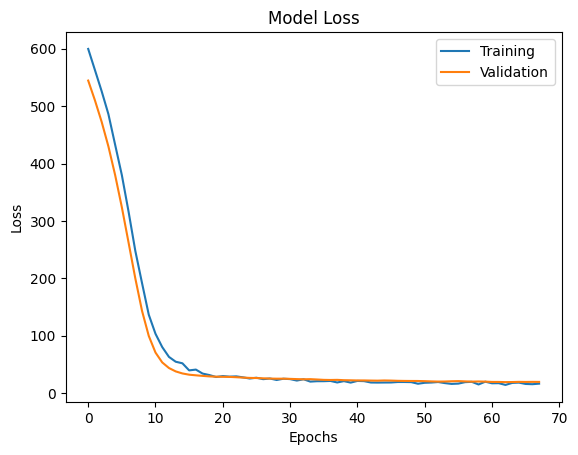

In [ ]:
from keras.callbacks import EarlyStopping

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# Plot the training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()


In [ ]:
# Evaluate the model on the testing set
loss, mae = model.evaluate(X_test, y_test)

# Print the mean absolute error
print('Mean Absolute Error:', mae)


5/5 [==============================] - 0s 8ms/step - loss: 12.9492 - mean_absolute_error: 2.3991
Mean Absolute Error: 2.399060010910034
